## prepro

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]
    
    return " " .join(text)

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):
    
    text = text.split()

    text=[y.lower() for y in text]
    
    return " " .join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan
            
def normalize_text(df):
    df.content=df.content.apply(lambda text : lower_case(text))
    df.content=df.content.apply(lambda text : remove_stop_words(text))
    df.content=df.content.apply(lambda text : Removing_numbers(text))
    df.content=df.content.apply(lambda text : Removing_punctuations(text))
    df.content=df.content.apply(lambda text : Removing_urls(text))
    df.content=df.content.apply(lambda text : lemmatization(text))
    return df

def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

df = pd.read_csv('dataset/emotions.csv')

# drop the tweet_id column
df.drop('tweet_id', axis=1, inplace=True)
index = df[df['content'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)
df.reset_index(inplace=True, drop = True)
df = normalize_text(df)
# current directory: 
dir = os.getcwd()
path = os.path.join(dir, 'dataset', 'emotions-prepro.csv')
df.to_csv(path, index=False)



# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tibed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tibed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
df.sentiment.value_counts()

sentiment
neutral       8598
worry         8437
happiness     5184
sadness       5154
love          3785
surprise      2181
fun           1775
relief        1522
hate          1322
empty          822
enthusiasm     758
boredom        179
anger          110
Name: count, dtype: int64

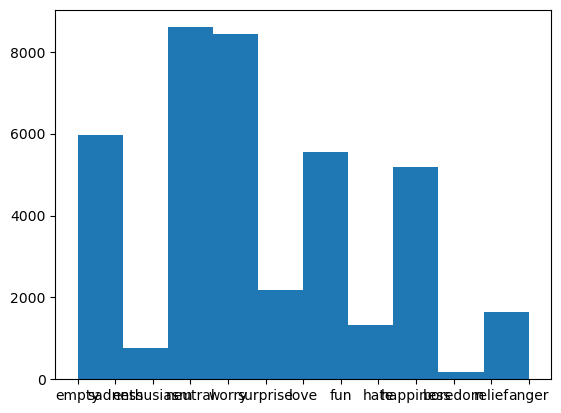

In [14]:
# plot the distribution of the labels
import matplotlib.pyplot as plt
plt.hist(df['sentiment'])
plt.show()

In [21]:
print(df["content"][0])
print(normalized_sentence(df["content"][0]))

@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[
tiffanylue know listenin bad habit earlier started freakin part


In [24]:
normalized_text = normalize_text(df)
normalized_text.head()

,sentiment,content
0,empty,tiffanylue know listenin bad habit earlier sta...
1,sadness,layin n bed headache ughhhh waitin call
2,sadness,funeral ceremony gloomy friday
3,enthusiasm,want hang friend soon
4,neutral,dannycastillo want trade someone houston ticke...


In [4]:
df.describe()

,sentiment,content
count,39827,39827
unique,13,39472
top,neutral,happy mother day
freq,8598,18


In [2]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

def text_preprocessing(text, language, minWordSize):
    
    # remove html
    text_no_html = BeautifulSoup(str(text),"html.parser" ).get_text()
    
    # remove non-letters
    text_alpha_chars = re.sub("[^a-zA-Z']", " ", str(text_no_html)) 
        
    # convert to lower-case
    text_lower = text_alpha_chars.lower()
    
    # remove stop words
    stops = set(stopwords.words(language)) 
    text_no_stop_words = ' '
    
    for w in text_lower.split():
        if w not in stops:  
            text_no_stop_words = text_no_stop_words + w + ' '
      
       # do stemming
    text_stemmer = ' '
    stemmer = SnowballStemmer(language)
    for w in text_no_stop_words.split():
        text_stemmer = text_stemmer + stemmer.stem(w) + ' '
         
    # remove short words
    text_no_short_words = ' '
    for w in text_stemmer.split(): 
        if len(w) >=minWordSize:
            text_no_short_words = text_no_short_words + w + ' '
 

    return text_no_short_words

In [4]:
import pandas as pd
df = pd.read_csv('dataset/emotions.csv')

In [ ]:
# loop over content column and preprocess each tweet
for i in range(len(df)):
    df.content.iloc[i] = text_preprocessing(df.content.iloc[i], 'english', 3)

In [6]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,tiffanylu know listenin bad habit earlier sta...
1,1956967666,sadness,layin bed headach ughhhh waitin call
2,1956967696,sadness,funer ceremoni gloomi friday
3,1956967789,enthusiasm,want hang friend soon
4,1956968416,neutral,dannycastillo want trade someon houston ticke...


# train test split

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/emotions-prepro.csv')

train_test_split = 0.2

# shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

# split the data into train and test csv files
msk = np.random.rand(len(df)) < train_test_split
train = df[msk]
test = df[~msk]

# save the train and test dataframes to csv files
train.to_csv('dataset/emotions-train.csv', index=False)
test.to_csv('dataset/emotions-test.csv', index=False)



In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
df = pd.read_csv('dataset/emotions-prepro.csv')

# Convert 'content' column to string type
df['content'] = df['content'].astype(str)

X = df.content
y = df.sentiment

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

tokenizer = Tokenizer(oov_token='UNK')
test = pd.concat([X_train,X_test])
tokenizer.fit_on_texts(test)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

maxlen = max([len(t) for t in df['content']])

X_train = pad_sequences(sequences_train, maxlen=maxlen, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=maxlen, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")


Vocabulary size = 43404


In [3]:
maxlen

136

In [7]:
# save the X_train, X_test, y_train, y_test
import pickle
# with open('dataset/X_train.pkl', 'wb') as f:
#     pickle.dump(X_train, f)
# with open('dataset/X_test.pkl', 'wb') as f:
#     pickle.dump(X_test, f)
# with open('dataset/y_train.pkl', 'wb') as f:
#     pickle.dump(y_train, f)
# with open('dataset/y_test.pkl', 'wb') as f:
#     pickle.dump(y_test, f)
# with open('dataset/vocabSize.pkl', 'wb') as f:
#     pickle.dump(vocabSize, f)



# train

In [5]:
import os
glove_file = os.path.join('dataset', 'glove.6B.200d.txt')
num_tokens = vocabSize
embedding_dim = 200
hits = 0
misses = 0

embeddings_index = {}

with open(glove_file, encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Found 400000 word vectors.
Converted 20279 words (23124 misses)


In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

adam = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(vocabSize, 200, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(64, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(64, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(13, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 136, 200)          8680800   
                                                                 
 bidirectional (Bidirectiona  (None, 136, 256)         336896    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 136, 128)         164352    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 13)                1677      
                                                        

In [8]:
# use gpu if available
history = model.fit(X_train, y_train, batch_size=256, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
 43/100 [===========>..................] - ETA: 3:49 - loss: 2.1318 - accuracy: 0.2470

KeyboardInterrupt: 